https://github.com/tfs4/liar_dataset

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import seaborn as sns

In [12]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

<Axes: title={'center': 'Class Distribution (Train)'}>

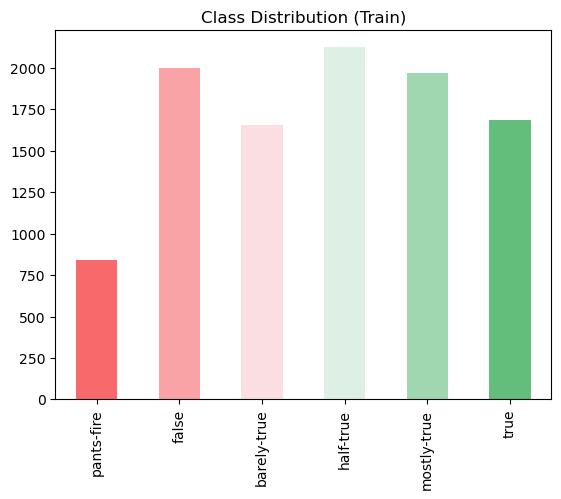

In [13]:
custom_order = ['pants-fire','false','barely-true','half-true','mostly-true','true']
custom_color = ['#F8696B','#F9A3A6','#FBDEE1','#DEF0E5','#A1D7B0','#63BE7B']

vc = train['V2'].value_counts()
vc = vc.loc[custom_order]
vc.plot(kind='bar',title='Class Distribution (Train)', color=custom_color)

In [14]:
def consolidate_label(x):
  a = []
  for i in x['V2']:
    if i=='false':
      a.append('pants-fire')
    elif i=='half-true':
      a.append('barely-true')
    elif i=='mostly-true':
      a.append('true')
    else:
      a.append(i)
  return a

train['V2'] = consolidate_label(train)

<Axes: title={'center': 'Aggregated Class Distribution (Train)'}>

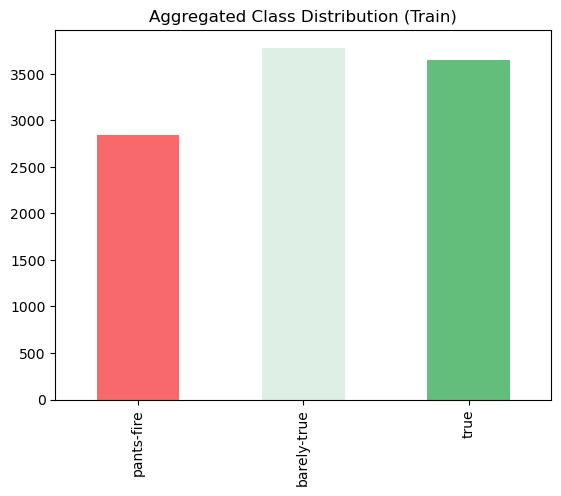

In [15]:
custom_order = ['pants-fire','barely-true','true']
custom_color = ['#F8696B','#DEF0E5','#63BE7B']

vc = train['V2'].value_counts()
vc = vc.loc[custom_order]
vc.plot(kind='bar',title='Aggregated Class Distribution (Train)', color=custom_color)

In [16]:
vc / len(train)

pants-fire     0.276561
barely-true    0.368098
true           0.355341
Name: V2, dtype: float64

In [17]:
train = train.iloc[:,[2,7,1]]
train.columns = ['text','party','label']
valid = valid.iloc[:,[2,7,1]]
valid.columns = ['text','party','label']
test = test.iloc[:,[2,7,1]]
test.columns = ['text','party','label']

def consolidate_label(x):
  a = []
  for i in x['label']:
    if i=='false':
      a.append('pants-fire')
    elif i=='half-true':
      a.append('barely-true')
    elif i=='mostly-true':
      a.append('true')
    else:
      a.append(i)
  return a

train['label'] = consolidate_label(train)
valid['label'] = consolidate_label(valid)
test['label'] = consolidate_label(test)


le = LabelEncoder()
le.fit(['pants-fire','barely-true','true'])
train['label'] = le.transform(train['label'])
valid['label'] = le.transform(valid['label'])
test['label'] = le.transform(test['label'])

print(train.shape)
print(valid.shape)
print(test.shape)

(10269, 3)
(1284, 3)
(1283, 3)


In [20]:
test['label'].value_counts()

0    481
2    460
1    342
Name: label, dtype: int64

In [21]:
train.head(5)

,text,party,label
0,Says the Annies List political group supports ...,republican,1
1,When did the decline of coal start? It started...,democrat,0
2,"Hillary Clinton agrees with John McCain ""by vo...",democrat,2
3,Health care reform legislation is likely to ma...,none,1
4,The economic turnaround started at the end of ...,democrat,0


In [22]:
train.isnull().sum()

text     0
party    0
label    0
dtype: int64

In [23]:
train=train.drop_duplicates(subset=['text', 'label'], keep='first')
train.shape

(10257, 3)

In [24]:
train['text_length'] = train.text.apply(lambda x: len(x.split()))
test['text_length'] = test.text.apply(lambda x: len(x.split()))

In [25]:
train['text_length'].describe()

count    10257.000000
mean        17.913815
std          7.747891
min          2.000000
25%         12.000000
50%         17.000000
75%         22.000000
max         66.000000
Name: text_length, dtype: float64

In [26]:
test['text_length'].describe()

count    1283.000000
mean       17.966485
std         7.761739
min         2.000000
25%        12.000000
50%        16.000000
75%        23.000000
max        48.000000
Name: text_length, dtype: float64

In [27]:
def plot_word_count(df, data_name):
  sns.distplot(df['text_length'].values)
  plt.title(f'Sequence char count: {data_name}')
  plt.grid(True)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
import string
from sklearn import preprocessing
from sklearn.manifold import TSNE
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
from time import time
from sklearn.model_selection import StratifiedKFold

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\Amanda\AppData\Local\Temp\ipykernel_8140\4272984878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['text_length'].values)
C:\Users\Amanda\AppData\Local\Temp\ipykernel_8140\4272984878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['text_length'].values)


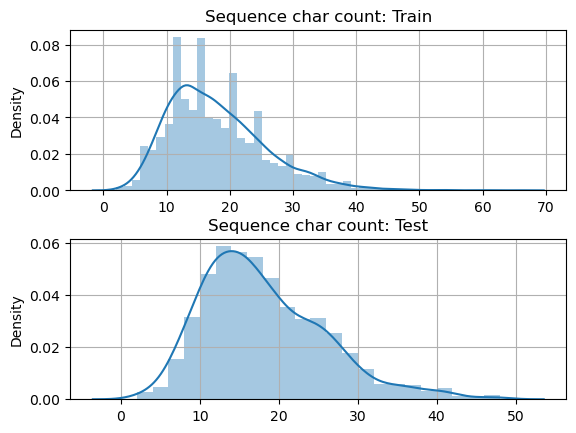

In [29]:
plt.subplot(2, 1, 1)  # Change 1st parameter to 2 for 2 rows
plot_word_count(train, 'Train')

plt.subplot(2, 1, 2)  # Change 1st parameter to 2 for 2 rows
plot_word_count(test, 'Test')

plt.subplots_adjust(hspace=0.3)  # Adjust bottom spacing if needed
plt.show()

In [30]:
list_= []
for i in train.text:
    list_ += i
list_= ''.join(list_)
allWords=list_.split()
vocabulary= set(allWords)

In [31]:
len(vocabulary)

26471

In [32]:
def create_corpus(df,label):
    corpus=[]
    
    for x in df[df['label']==label]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

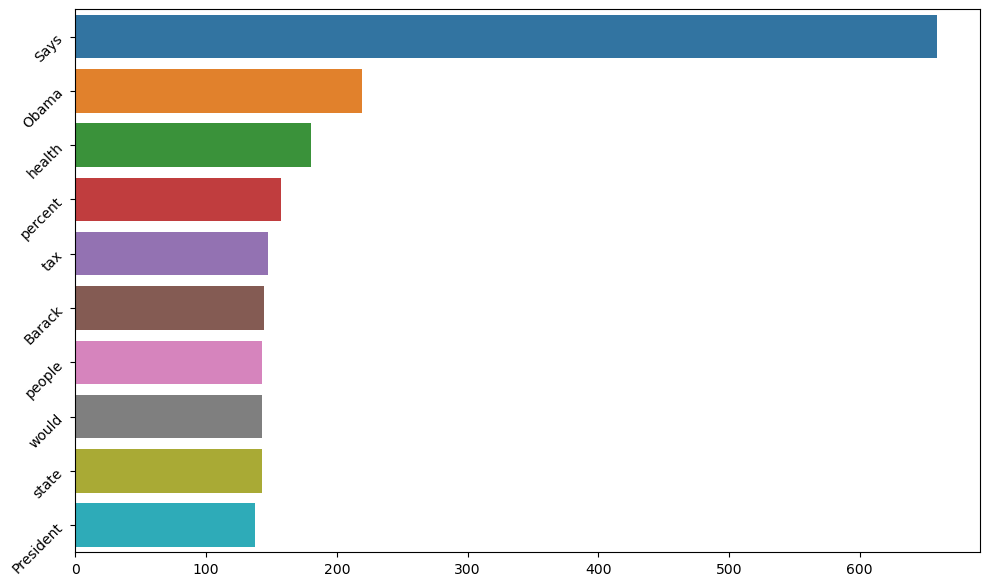

In [35]:
import collections

# Get the list of stop words
stop_words = set(stopwords.words('english'))

# Create the corpus
allWords = create_corpus(train, label=1)

# Remove stop words from the corpus
filtered_words = [word for word in allWords if word.lower() not in stop_words]

# Count the frequency of each word
word_freq = collections.Counter(filtered_words)

# Get the 20 most frequent words
most_common_words = word_freq.most_common(10)

# Plot the most frequent 20 words
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x=[count for word, count in most_common_words], y=[word for word, count in most_common_words])

# Rotate labels on the y-axis if necessary
plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to make the plot more compact
plt.show()

## Text Preprocessing

In [36]:
pstem = PorterStemmer()
def clean_text(text):
    text= text.lower()
    text= re.sub('[0-9]', '', text)
    text  = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens=[pstem.stem(word) for word in tokens]
    # tokens=[word for word in tokens if word not in stopwords.words('english')]
    text = ' '.join(tokens)
    return text

In [37]:
train["clean"]=train["text"].apply(clean_text)
test["clean"]=test["text"].apply(clean_text)

In [38]:
train[["text","clean"]].head(5)

,text,clean
0,Says the Annies List political group supports ...,say the anni list polit group support thirdtri...
1,When did the decline of coal start? It started...,when did the declin of coal start it start whe...
2,"Hillary Clinton agrees with John McCain ""by vo...",hillari clinton agre with john mccain by vote ...
3,Health care reform legislation is likely to ma...,health care reform legisl is like to mandat fr...
4,The economic turnaround started at the end of ...,the econom turnaround start at the end of my term


In [39]:
list_= []
for i in train.clean:
    list_ += i
list_= ''.join(list_)
allWords=list_.split()
vocabulary= set(allWords)
len(vocabulary)

15818

## TFIDF

In [40]:
tfidf = TfidfVectorizer(sublinear_tf=True,max_features=1000, min_df=1, max_df=0.95, norm='l2',  ngram_range=(1,2), stop_words = 'english')
features = tfidf.fit_transform(train.clean)
features.shape

(10257, 1000)

In [41]:
features_test = tfidf.transform(test.clean)

In [42]:
trainX = features
trainY = train['label']
testX = features_test
testY = test['label']

In [43]:
mod = LogisticRegression(penalty='l1', solver='liblinear')
mod.fit(trainX,trainY)

LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
tfidf.get_feature_names_out()

array(['abl', 'abort', 'abov', 'abus', 'accept', 'access', 'accord',
       'account', 'act', 'action', 'activ', 'actual', 'ad', 'add',
       'addit', 'address', 'administr', 'adopt', 'affect', 'afford',
       'afford care', 'afghanistan', 'africanamerican', 'age', 'agenc',
       'ago', 'agre', 'agreement', 'aid', 'air', 'alaska', 'alien',
       'allow', 'alon', 'alreadi', 'alway', 'amend', 'america',
       'american', 'american peopl', 'amnesti', 'ani', 'ani state',
       'ani time', 'announc', 'annual', 'anoth', 'anybodi', 'anyon',
       'anyth', 'approv', 'approxim', 'area', 'arizona', 'arm', 'arrest',
       'ask', 'assault', 'atlanta', 'attack', 'attempt', 'attend',
       'attorney', 'attorney gener', 'austin', 'author', 'auto', 'averag',
       'away', 'babi', 'background', 'background check', 'bailout',
       'balanc', 'balanc budget', 'ballot', 'ban', 'bank', 'barack',
       'barack obama', 'bargain', 'base', 'basic', 'becam', 'becaus',
       'becom', 'befor', 'begin

In [45]:
pd.DataFrame(mod.coef_).iloc[1].nlargest(10)

569    2.182432
737    1.864244
595    1.650253
887    1.610041
696    1.566309
419    1.523877
808    1.467008
252    1.436700
135    1.366643
882    1.347778
Name: 1, dtype: float64

In [46]:
# Convert the coefficients to a DataFrame
coef_df = pd.DataFrame(mod.coef_)

# Select the second row (index 1)
second_row = coef_df.iloc[1]

# Get the feature names from tfidf vectorizer
feature_names = tfidf.get_feature_names_out()

# Create a dictionary mapping index to feature name
index_to_feature = {i: feature_names[i] for i in range(len(feature_names))}

# Map the index to feature name for top 10 highest values
top_10_values_with_feature_names = [(index_to_feature[i], value) for i, value in second_row.nlargest(10).items()]

print(top_10_values_with_feature_names)

[('muslim', 2.18243217587295), ('rep', 1.8642444745852285), ('obama', 1.6502526566231523), ('tax increas', 1.6100412232088992), ('protest', 1.5663093071646217), ('illeg', 1.5238769321795138), ('scott walker', 1.4670083361932371), ('doctor', 1.4366996468783875), ('care law', 1.3666428933365309), ('talk', 1.3477781255730055)]


In [47]:
from IPython.display import display

# Convert the list of tuples to a DataFrame
top_10_df = pd.DataFrame(top_10_values_with_feature_names, columns=['Feature Name', 'Coefficient Value'])

# Display the DataFrame
display(top_10_df)

,Feature Name,Coefficient Value
0,muslim,2.182432
1,rep,1.864244
2,obama,1.650253
3,tax increas,1.610041
4,protest,1.566309
5,illeg,1.523877
6,scott walker,1.467008
7,doctor,1.436700
8,care law,1.366643
9,talk,1.347778


In [48]:
print(roc_auc_score(testY, mod.predict_proba(testX), average='macro', multi_class='ovr'))
print(roc_auc_score(testY, mod.predict_proba(testX), average='micro', multi_class='ovr'))
print(confusion_matrix(testY, mod.predict(testX)))
print(classification_report(testY,mod.predict(testX), digits=4))

0.5881554730535502
0.6036356478902417
[[219  82 180]
 [150  74 118]
 [152  60 248]]
              precision    recall  f1-score   support

           0     0.4203    0.4553    0.4371       481
           1     0.3426    0.2164    0.2652       342
           2     0.4542    0.5391    0.4930       460

    accuracy                         0.4217      1283
   macro avg     0.4057    0.4036    0.3985      1283
weighted avg     0.4118    0.4217    0.4114      1283



## CountVectorizer

In [37]:
countvector = CountVectorizer(max_features=1000, min_df=1, max_df=0.95, ngram_range=(1,2), stop_words = 'english')
features = countvector.fit_transform(train.clean)
features.shape

(10257, 1000)

In [38]:
features_test = countvector.transform(test.clean)

In [39]:
trainX = features
trainY = train['label']
testX = features_test
testY = test['label']

In [40]:
mod = LogisticRegression(penalty='l1', solver='liblinear')
mod.fit(trainX,trainY)

LogisticRegression(penalty='l1', solver='liblinear')

In [41]:
countvector.get_feature_names_out()

array(['abl', 'abort', 'abov', 'abus', 'accept', 'access', 'accord',
       'account', 'act', 'action', 'activ', 'actual', 'ad', 'add',
       'addit', 'address', 'administr', 'adopt', 'affect', 'afford',
       'afford care', 'afghanistan', 'africanamerican', 'age', 'agenc',
       'ago', 'agre', 'agreement', 'aid', 'air', 'alaska', 'alien',
       'allow', 'alon', 'alreadi', 'alway', 'amend', 'america',
       'american', 'american peopl', 'amnesti', 'ani', 'ani state',
       'ani time', 'announc', 'annual', 'anoth', 'anybodi', 'anyon',
       'anyth', 'approv', 'approxim', 'area', 'arizona', 'arm', 'arrest',
       'ask', 'assault', 'atlanta', 'attack', 'attempt', 'attend',
       'attorney', 'attorney gener', 'austin', 'author', 'auto', 'averag',
       'away', 'babi', 'background', 'background check', 'bailout',
       'balanc', 'balanc budget', 'ballot', 'ban', 'bank', 'barack',
       'barack obama', 'bargain', 'base', 'basic', 'becam', 'becaus',
       'becom', 'befor', 'begin

In [42]:
pd.DataFrame(mod.coef_).iloc[1].nlargest(10)

884    1.132055
569    1.105893
696    0.933674
300    0.903810
866    0.883874
430    0.877005
719    0.842755
737    0.840258
887    0.829005
815    0.821787
Name: 1, dtype: float64

In [43]:
# Convert the coefficients to a DataFrame
coef_df = pd.DataFrame(mod.coef_)

# Select the second row (index 1)
second_row = coef_df.iloc[1]

# Get the feature names from tfidf vectorizer
feature_names = tfidf.get_feature_names_out()

# Create a dictionary mapping index to feature name
index_to_feature = {i: feature_names[i] for i in range(len(feature_names))}

# Map the index to feature name for top 10 highest values
top_10_values_with_feature_names = [(index_to_feature[i], value) for i, value in second_row.nlargest(10).items()]

print(top_10_values_with_feature_names)

[('tax break', 1.1320551250970916), ('muslim', 1.105893266654915), ('protest', 0.9336737194961212), ('everybodi', 0.9038101934993827), ('statist', 0.8838740631196798), ('incom tax', 0.8770048330243035), ('realli', 0.8427545460041445), ('rep', 0.840257700482194), ('tax increas', 0.8290051265408288), ('sell', 0.8217868489935366)]


In [44]:
from IPython.display import display

# Convert the list of tuples to a DataFrame
top_10_df = pd.DataFrame(top_10_values_with_feature_names, columns=['Feature Name', 'Coefficient Value'])

# Display the DataFrame
display(top_10_df)

,Feature Name,Coefficient Value
0,tax break,1.132055
1,muslim,1.105893
2,protest,0.933674
3,everybodi,0.903810
4,statist,0.883874
5,incom tax,0.877005
6,realli,0.842755
7,rep,0.840258
8,tax increas,0.829005
9,sell,0.821787


In [45]:
print(roc_auc_score(testY, mod.predict_proba(testX), average='macro', multi_class='ovr'))
print(roc_auc_score(testY, mod.predict_proba(testX), average='micro', multi_class='ovr'))
print(confusion_matrix(testY, mod.predict(testX)))
print(classification_report(testY,mod.predict(testX), digits=4))

0.5847795181969327
0.5971827768729394
[[204 102 175]
 [132  98 112]
 [152  80 228]]
              precision    recall  f1-score   support

           0     0.4180    0.4241    0.4211       481
           1     0.3500    0.2865    0.3151       342
           2     0.4427    0.4957    0.4677       460

    accuracy                         0.4131      1283
   macro avg     0.4036    0.4021    0.4013      1283
weighted avg     0.4087    0.4131    0.4095      1283

